<a href="https://colab.research.google.com/github/OmiWakode/mood-of-the-world-notebook/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Emotion Classification

This notebook is implementation of the deep learning model used in my website : [mood-of-the-world](https://mood-of-the-world-327216.web.app).
It focusses to classify emotion of a country (tweets), based on sentiment attached to them, with the aim to classify the tweets based on one or more of 11 emotions: the eight Plutchik Categories:
- joy,    
- sadness,
- anger,
- fear,
- trust,
- disgust,
- surprise,
- anticipation
</br> *plus*
- love,
- optimism,
- pessimism
<center>
<img src="https://www.visualcapitalist.com/wp-content/uploads/2021/04/plutchik-emotion-wheel.png" width="400">
</center>

## using deep learning methods to perform mutilabel classification of the text. LSTM ( Long term short memory) deep learning model for text classification problem.

Data set was provided by [SemEval](https://aclanthology.org/S18-1001/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_c = pd.read_csv("/content/drive/MyDrive/sentiment-analysis/data-set/E-c/2018-E-c-En-train.txt", sep='\t')

In [ ]:
df_val =  pd.read_csv("/content/drive/MyDrive/sentiment-analysis/data-set/E-c/2018-E-c-En-dev.txt", sep='\t')

In [ ]:
df_gold = pd.read_csv("/content/drive/MyDrive/sentiment-analysis/data-set/E-c/2018-E-c-En-test-gold.txt", sep='\t')

In [ ]:
df_gold

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,1,1,0,0,0,0,1,0,0,0,1
1,2018-En-03739,"Academy of Sciences, eschews the normally sobe...",0,0,1,0,0,0,0,0,0,0,0
2,2018-En-00385,I blew that opportunity -__- #mad,1,0,1,0,0,0,0,0,1,0,0
3,2018-En-03001,This time in 2 weeks I will be 30... 😥,0,0,0,0,1,0,0,0,1,0,0
4,2018-En-01988,#Deppression is real. Partners w/ #depressed p...,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-En-03848,shaft abrasions from panties merely shifted to...,1,0,0,0,0,0,0,1,0,0,0
3255,2018-En-00416,@lomadia heard of Remothered? Indie horror gam...,0,1,0,0,0,0,0,1,0,0,0
3256,2018-En-03717,All this fake outrage. Y'all need to stop 🤣,1,0,1,0,0,0,0,0,0,0,0
3257,2018-En-03504,Would be ever so grateful if you could record ...,0,0,0,0,1,0,0,0,0,0,0


# EDA
(Exploratory Data Analysis)

In [ ]:
df_gold[df_gold.anger==1]['anger'].count()

1101

In [ ]:
emotions = df_c.columns[2:].tolist()
emotions

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [ ]:
len(df_gold)

3259

In [ ]:
df_c['anticipation'][0]

1

In [ ]:
count = 0
for ind in df_c.index:
  flag = True
  for emotion in emotions:
    if df_c[emotion][ind] == 1:
      flag = False
      break
  if flag:
    count= count+1
    
count

204

In [ ]:
emotion_dict = {}
for emotion in emotions:
  emotion_dict[emotion] = df_c[df_c[emotion]==1][emotion].count()
emotion_dict['Neutral'] = count
em_df_t = pd.DataFrame(data=emotion_dict, index=['Values'])
em_df = em_df_t.T
em_df = em_df.sort_values('Values', ascending= False)
list_col = em_df.T.columns.tolist()
list_col

In [ ]:
h = np.array(em_df.values)
h = h.flatten()

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})

## Visualizing the tweets per emotion

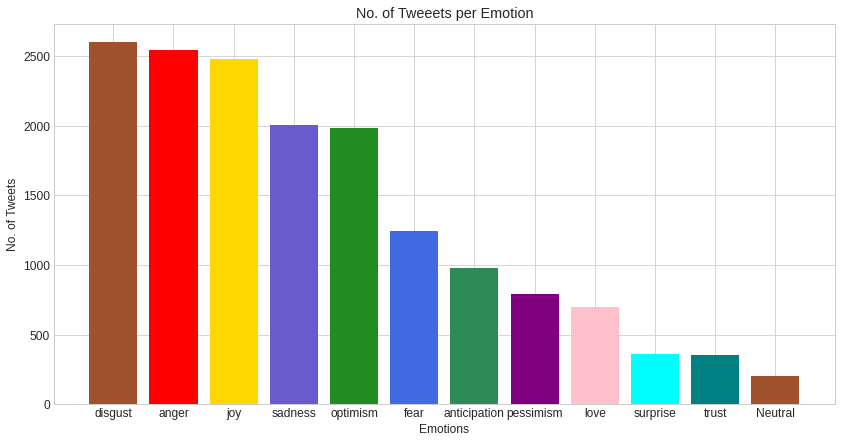

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('Emotions')
plt.ylabel('No. of Tweets')
plt.bar(x=list_col, height=h, color=['sienna','red', 'gold', 
                  'slateblue', 'forestgreen' ,'royalblue', 'seagreen', 'purple', 'pink','cyan','teal']);
plt.title('No. of Tweeets per Emotion');


In [ ]:
df_val.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-00866,"@RanaAyyub @rajnathsingh Oh, hidden revenge an...",1,0,1,0,0,0,0,0,0,0,0
1,2018-En-02590,I'm doing all this to make sure you smiling do...,0,0,0,0,1,1,1,0,0,0,0
2,2018-En-03361,if not then #teamchristine bc all tana has don...,1,0,1,0,0,0,0,0,0,0,0
3,2018-En-03230,It is a #great start for #beginners to jump in...,0,0,0,0,1,0,1,0,0,0,0
4,2018-En-01143,My best friends driving for the first time wit...,0,0,0,1,0,0,0,0,0,0,0


# Pre-Processing the Data 

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
df_c['Tweet']

0       “Worry is a down payment on a problem you may ...
1       Whatever you decide to do make sure it makes y...
2       @Max_Kellerman  it also helps that the majorit...
3       Accept the challenges so that you can literall...
4       My roommate: it's okay that we can't spell bec...
                              ...                        
6833    @nicky57672 Hi! We are working towards your hi...
6834    @andreamitchell said @berniesanders not only d...
6835    @isthataspider @dhodgs i will fight this guy! ...
6836    i wonder how a guy can broke his penis while h...
6837     I'm highly animated even though I'm decomposing.
Name: Tweet, Length: 6838, dtype: object

In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 5.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=b02863d4eea0e22f49f69533619dc11af806ce7090c225ae24c758a5ccad445e
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import string
import re
import emoji
import itertools

### Handling Contractions and Emojis in the tweet texts.


In [ ]:
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }


Coverting emojis to text

In [ ]:
def load_dict_smileys():
    
    return {
        ":-)" : "smile",
        ";)": "wink",
        ":)": "smile",
        ":-]":"smile",
        ":-3":"smile",
        ":->":"smile",
        "8-)":"smile",
        ":-}":"smile",
        ":)":"smile",
        ":]":"smile",
        ":3":"smile",
        ":>":"smile",
        "8)":"smile",
        ":}":"smile",
        ":o)":"smile",
        ":c)":"smile",
        ":^)":"smile",
        "=]":"smile",
        "=)":"smile",
        ":-))":"smile",
        ":‑D":"smile",
        "8‑D":"laugh",
        "x‑D":"laugh",
        "X‑D":"laugh",
        ":D":"smile",
        "8D":"smily",
        "xD":"laugh",
        "XD":"laugh",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":')": "tear_of_joy",
        ":'‑(":"cry",
        ":'(":"cry",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love",
        ";)": "wink",
        }

###  Lemmatisation, Stemming and Tokenizing the text data

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers


In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer  

#Lemmanization
wordnet_lemmatizer = WordNetLemmatizer()
#Stemming

stopwords = set(stopwords.words('english'))

def tokenize_lemma_stopwords(text):

    #removing the escape sequences
   

    text = text.replace("\\n", " ")
    #text = text.replace("\r", " ")

    
    text = text.replace("“", " ")
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'#', '', text)

    #handling emoticons
    SMILEY = load_dict_smileys()  
    words = text.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    text = " ".join(reformed)

    

    #handling contractions
    CONTRACTIONS = load_dict_contractions()
    text = re.sub(r"’", "'", text)
    words = text.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    text = " ".join(reformed)

    text = re.sub(r'\'', '', text)

    
    

    #Deal with emojis
    text = emoji.demojize(text)

    text = text.replace(":"," ")
    text = ' '.join(text.split())



    # Standardizing words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))

    # split string into words (tokens)
    tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True )
    
    tokens = tokenizer.tokenize(text)

    #removing punctuations
    tokens = [t for t in tokens if t not in string.punctuation]


    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords


    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["Tweet"] = data["Tweet"].apply(tokenize_lemma_stopwords)
    return data



### Encoding the text

In [ ]:
 
#max_words = 5000

def encoding(df):

  tokenizer = Tokenizer(num_words= 280)
  tokenizer.fit_on_texts(df.Tweet)
  sequences = tokenizer.texts_to_sequences(df.Tweet)
  tweets = pad_sequences(sequences)
  return tweets , len(tokenizer.word_index)+1, tokenizer



In [ ]:
clean_data = dataCleaning(df_c)
clean_encoded = clean_data.copy()
X, vocab_size, tokenizer = encoding(clean_encoded)
X.shape

(6838, 76)

### Training Glove embeddings

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/sentiment-analysis/data-set/glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
vocab_size

10933

In [ ]:
y = clean_data.drop( labels=['ID', 'Tweet'], axis=1)
y

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6833,0,0,0,0,0,0,0,0,0,0,0
6834,0,1,0,0,0,0,0,0,0,1,0
6835,1,0,1,0,0,0,0,1,0,0,0
6836,0,0,0,0,0,0,0,0,0,1,0


# Building a Sequential Model including word embeddings 

Performing Word embeddings layer and add LSTM ( Long Term Short Memory) layers to our sequential deep learning model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((5470, 76), (5470, 11))

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
#from keras.layers.normalization import BatchNormalization
#from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.callbacks import ModelCheckpoint

In [ ]:
np.random.seed(42)
#max_words = 6838
model2 = Sequential()
model2.add(layers.Embedding(300,40, input_length=300))
model2.add(layers.Bidirectional(layers.LSTM(55,dropout=0.2)))
model2.add(layers.Dense(11,activation='sigmoid'))
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', 
                              verbose=1,save_best_only=True, mode='auto',
                              period=1,save_weights_only=False)

history = model2.fit(X_train, y_train, batch_size = 32, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/5
171/171 [==============================] - 11s 42ms/step - loss: 0.4737 - accuracy: 0.2673 - val_loss: 0.4636 - val_accuracy: 0.4386

Epoch 00001: val_accuracy improved from -inf to 0.43860, saving model to best_model2.hdf5
Epoch 2/5
171/171 [==============================] - 6s 37ms/step - loss: 0.4273 - accuracy: 0.4296 - val_loss: 0.4263 - val_accuracy: 0.4401

Epoch 00002: val_accuracy improved from 0.43860 to 0.44006, saving model to best_model2.hdf5
Epoch 3/5
171/171 [==============================] - 6s 37ms/step - loss: 0.4048 - accuracy: 0.4360 - val_loss: 0.4163 - val_accuracy: 0.2602

Epoch 00003: val_accuracy did not improve from 0.44006
Epoch 4/5
171/171 [==============================] - 6s 37ms/step - loss: 0.3923 - accuracy: 0.4170 - val_loss: 0.4067 - val_accuracy: 0.5102

Epoch 00004: val_accuracy improved from 0.44006 to 0.51023, saving model to best_model2.hdf5
Epoch 5/5
171/171 [==============================] - 6s 37ms/step - loss: 0.3805 - accuracy: 0.4

We get an accuracy of 51%


In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
y_pred[0][0]

0.46753144

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import jaccard_score
score = jaccard_score( y_test, y_pred, average='weighted')
score

0.0

In [ ]:
np.random.seed(42)
#max_words = 6838
model2 = Sequential()
model2.add(Embedding(vocab_size,600, input_length= 76))
model2.add(Bidirectional(LSTM(50,dropout=0.3)))
#model2.add(Bidirectional(LSTM(55,dropout=0.2)))
model2.add(Flatten())
model2.add(Dense(150, activation='relu'))
model2.add(Dense(11,activation='sigmoid'))
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', 
                              verbose=1,save_best_only=True, mode='auto',
                              period=1,save_weights_only=False)


In [ ]:
model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 76, 600)           6559800   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 100)               260400    
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_78 (Dense)             (None, 11)                1661      
Total params: 6,837,011
Trainable params: 6,837,011
Non-trainable params: 0
_________________________________________________________________


We get an accuracy score of 49%

In [ ]:
model2.save('/content/drive/MyDrive/sentiment-analysis')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment-analysis/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment-analysis/assets


# Super-Data-Set
(Using more data to train the model)

In [ ]:
df_gold = pd.read_csv("/content/drive/MyDrive/sentiment-analysis/data-set/E-c/2018-E-c-En-test-gold.txt", sep='\t')

In [ ]:
super_df = pd.concat([df_c, df_val, df_gold], ignore_index=True)
super_df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


## Visualizing the tweets per emotion on the super data set

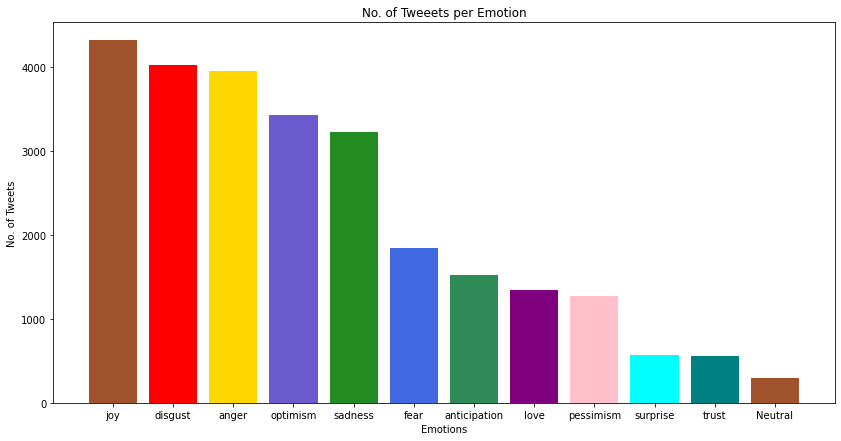

In [ ]:
def visialise_tweets(df):
  emotions = df.columns[2:].tolist()
  count = 0
  for ind in df.index:
    flag = True
    for emotion in emotions:
      
      if df[emotion][ind] == 1:
        flag = False
        break
    if flag:
      count= count+1
  emotion_dict = {}
  for emotion in emotions:
    emotion_dict[emotion] = df[df[emotion]==1][emotion].count()

  emotion_dict['Neutral'] = count
  em_df_t = pd.DataFrame(data=emotion_dict, index=['Values'])
  em_df = em_df_t.T
  em_df = em_df.sort_values('Values', ascending= False)
  list_col = em_df.T.columns.tolist()
  h = np.array(em_df.values)
  h = h.flatten()
  plt.figure(figsize=(14,7))
  plt.xlabel('Emotions')
  plt.ylabel('No. of Tweets')
  plt.bar(x=list_col, height=h, color=['sienna','red', 'gold', 
                    'slateblue', 'forestgreen' ,'royalblue', 'seagreen', 'purple', 'pink','cyan','teal']);
  plt.title('No. of Tweeets per Emotion');

visialise_tweets(super_df)


In [ ]:
clean_super_data = dataCleaning(super_df)
clean_super_data.Tweet

0        worry payment problem may never joyce meyer mo...
1                     whatever decide make sure make happy
2        also help majority nfl coaching inept bill obr...
3        accept challenge literally even feel exhilarat...
4        roommate okay cannot spell autocorrect terribl...
                               ...                        
10978    shaft abrasion panty merely shifted side theol...
10979    heard remothered indie horror game writing ama...
10980    fake outrage yall need stop rolling_on_the_flo...
10981    would ever grateful could record garden forgiv...
10982    wholesome drunk sends people meme compliment snap
Name: Tweet, Length: 10983, dtype: object

In [ ]:
X, vocab_size, tokenizer = encoding(clean_super_data)

In [ ]:
X.shape

(10983, 76)

In [ ]:
y = super_df[emotions]
y

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10978,1,0,0,0,0,0,0,1,0,0,0
10979,0,1,0,0,0,0,0,1,0,0,0
10980,1,0,1,0,0,0,0,0,0,0,0
10981,0,0,0,0,1,0,0,0,0,0,0


## Training the model on super-data set

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

      

In [ ]:
np.random.seed(42)
model3 = Sequential()
model3.add(layers.Embedding(vocab_size,40,input_length=76 )) #The embedding layer
model3.add(layers.LSTM(15,dropout=0.3)) #Our LSTM layer
model3.add(layers.Dense(11, activation='sigmoid'))


model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy',
                              verbose=1,save_best_only=True, mode='auto', 
                              period=1,save_weights_only=False)

model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 76, 40)            624600    
_________________________________________________________________
lstm_23 (LSTM)               (None, 15)                3360      
_________________________________________________________________
dense_58 (Dense)             (None, 11)                176       
Total params: 628,136
Trainable params: 628,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model3.fit(X_train, y_train, epochs=25,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/25
275/275 [==============================] - 5s 18ms/step - loss: 0.3778 - accuracy: 0.4832 - val_loss: 0.3865 - val_accuracy: 0.4524

Epoch 00001: val_accuracy did not improve from 0.52025
Epoch 2/25
275/275 [==============================] - 5s 18ms/step - loss: 0.3757 - accuracy: 0.4811 - val_loss: 0.3862 - val_accuracy: 0.4620

Epoch 00002: val_accuracy did not improve from 0.52025
Epoch 3/25
275/275 [==============================] - 5s 18ms/step - loss: 0.3729 - accuracy: 0.4721 - val_loss: 0.3834 - val_accuracy: 0.4684

Epoch 00003: val_accuracy did not improve from 0.52025
Epoch 4/25
275/275 [==============================] - 5s 19ms/step - loss: 0.3713 - accuracy: 0.4759 - val_loss: 0.3818 - val_accuracy: 0.5075

Epoch 00004: val_accuracy did not improve from 0.52025
Epoch 5/25
275/275 [==============================] - 5s 17ms/step - loss: 0.3694 - accuracy: 0.4829 - val_loss: 0.3800 - val_accuracy: 0.4324

Epoch 00005: val_accuracy did not improve from 0.52025
Epoch

We got an accuracy score of 52%

In [ ]:
model3.save('/content/drive/MyDrive/sentiment-analysis/data-set/model3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment-analysis/data-set/model3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/sentiment-analysis/data-set/model3/assets


In [ ]:
np.random.seed(42)
model8 = Sequential()
model8.add(layers.Embedding(vocab_size,40,input_length= 76)) #The embedding layer
model8.add(layers.LSTM(15,dropout=0.3)) #Our LSTM layer
model8.add(layers.Dense(11, activation='sigmoid'))


model8.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy',
                              verbose=1,save_best_only=True, mode='auto', 
                              period=1,save_weights_only=False)

model8.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 76, 40)            624600    
_________________________________________________________________
lstm_37 (LSTM)               (None, 15)                3360      
_________________________________________________________________
dense_74 (Dense)             (None, 11)                176       
Total params: 628,136
Trainable params: 628,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model8.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/5
275/275 [==============================] - 12s 37ms/step - loss: 0.4934 - accuracy: 0.1684 - val_loss: 0.4722 - val_accuracy: 0.2749

Epoch 00001: val_accuracy improved from -inf to 0.27492, saving model to best_model1.hdf5
Epoch 2/5
275/275 [==============================] - 10s 35ms/step - loss: 0.4731 - accuracy: 0.2769 - val_loss: 0.4717 - val_accuracy: 0.2749

Epoch 00002: val_accuracy did not improve from 0.27492
Epoch 3/5
275/275 [==============================] - 10s 35ms/step - loss: 0.4730 - accuracy: 0.2608 - val_loss: 0.4716 - val_accuracy: 0.2749

Epoch 00003: val_accuracy did not improve from 0.27492
Epoch 4/5
275/275 [==============================] - 10s 35ms/step - loss: 0.4730 - accuracy: 0.2612 - val_loss: 0.4726 - val_accuracy: 0.0633

Epoch 00004: val_accuracy did not improve from 0.27492
Epoch 5/5
275/275 [==============================] - 10s 35ms/step - loss: 0.4731 - accuracy: 0.2598 - val_loss: 0.4719 - val_accuracy: 0.2749

Epoch 00005: val_accuracy

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f64899504d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [ ]:
yhat = model4.predict(X_test,
                       verbose=1)
preds = model4.predict_proba(X_test)
preds = preds.round()
preds

69/69 [==============================] - 0s 6ms/step


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model4.save('/content/drive/MyDrive/sentiment-analysis/final_sentiment_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/sentiment-analysis/final_sentiment_model.h5')

In [ ]:
y = model.predict(X_test)
y.shape

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f64899504d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


(2197, 11)

# Testing on a custom tweet text
emotions = ['anger',
        'anticipation',
        'disgust',
        'fear',
        'joy',
        'love',
        'optimism',
        'pessimism',
        'sadness',
        'surprise',
        'trust']


In [ ]:
omi = "I love my everything about Indian food 🥘 ❤️#enamored hehehe "   

In [ ]:
def encoding_trial(text):
  tokenizer = Tokenizer(num_words= 300)
  tokenizer.fit_on_texts(text)
  sequences = tokenizer.texts_to_sequences(text)
  tweets = pad_sequences(sequences)
  return tweets

In [ ]:
clean_omi = tokenize_lemma_stopwords(omi)
clean_encoded = encoding_trial(clean_omi)
clean_omi

'love everything indian food shallow_pan_of_food red_heart enamored hehehe'

In [ ]:
y_preds = model.predict(clean_encoded)
y_preds

array([[0.4965694 , 0.40275267, 0.4632322 , 0.19896516, 0.504248  ,
        0.3055402 , 0.355515  , 0.24281305, 0.37305075, 0.34639764,
        0.20888835],
       [0.5873239 , 0.40400076, 0.57129323, 0.3341218 , 0.35704988,
        0.20433885, 0.3139935 , 0.2981884 , 0.41906452, 0.27236953,
        0.17220286],
       [0.33554497, 0.47949508, 0.3299147 , 0.39861834, 0.5359993 ,
        0.2868261 , 0.48556584, 0.2011328 , 0.23527029, 0.26956642,
        0.27714035],
       [0.57370734, 0.3102901 , 0.58858377, 0.32281303, 0.26927274,
        0.22821116, 0.21294543, 0.4753049 , 0.72725546, 0.32966903,
        0.14484453],
       [0.45295134, 0.41601223, 0.4649031 , 0.40166986, 0.45662725,
        0.36628807, 0.43269122, 0.36998758, 0.44667292, 0.3446885 ,
        0.28416914],
       [0.57370734, 0.3102901 , 0.58858377, 0.32281303, 0.26927274,
        0.22821116, 0.21294543, 0.4753049 , 0.72725546, 0.32966903,
        0.14484453],
       [0.33554497, 0.47949508, 0.3299147 , 0.39861834, 0.

In [ ]:
def get_emotions(y_preds):

  emotions = ['anger', 'anticipation', 
              'disgust', 'fear', 'joy', 'love', 
              'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
  result_emotions = [0 for i in range(11)]
    
  for i in range(len(y_preds)):
      for j in range(11):
          result_emotions[j]+=y_preds[i][j]

  result_emotions = [x/len(y_preds) for x in result_emotions]
  # norm = np.linalg.norm(result_emotions)
  # result_emotions = result_emotions/norm
  result_emotions = np.array(result_emotions)
  result_emotions = result_emotions/ sum(result_emotions)
    

  emotion_dict = {}
  for i in range(11):
      emotion_dict[emotions[i]] = result_emotions[i]

  return emotion_dict


### Plotting the predicted probablities of emotions by the model


In [ ]:
emotion_dict = get_emotions(y_preds)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129368 missing from current font.
  font.set_text(s, 0, flags=flags)


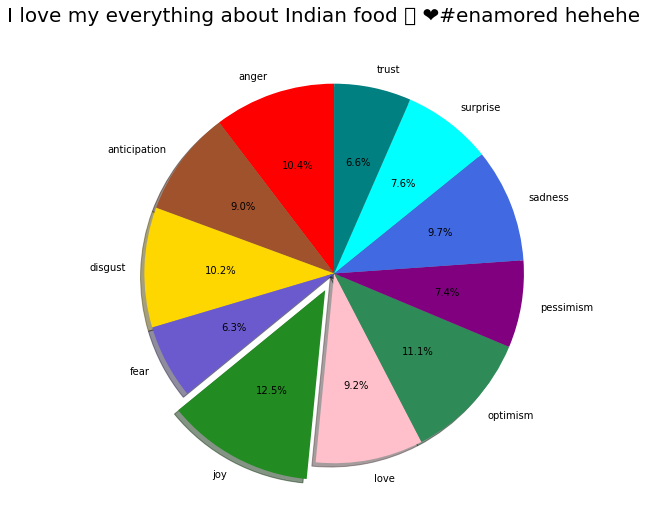

In [ ]:
emotion_probablities = []

for emotion_proba in emotion_dict.values():
    emotion_probablities.append(emotion_proba)

explode = (0, 0, 0, 0, 0.1, 0, 0, 0,0, 0 , 0)  # only "explode" the 2nd slice (i.e. 'Joy')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(emotion_probablities, explode=explode, labels=emotions, autopct='%1.1f%%',
      shadow=True, startangle=90,colors=['red','sienna', 'gold', 
                  'slateblue', 'forestgreen' ,'pink', 'seagreen', 'purple', 'royalblue','cyan','teal'] )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle(omi, fontsize=20);
plt.show();
